In [15]:
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pymc as pm
print(f"Running on PyMC v{pm.__version__}")

%config InlineBackend.figure_format = "retina"

# 初始化随机数字生成器
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

Running on PyMC v5.7.0


# 数据生成

In [12]:
# true parameter values
alpha, beta, sigma = 1, [1, 2.5], 1

# size of dataset
size = 100

# predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size = size) * sigma

In [13]:
print(f"X1.shape: {X1.shape}")
print(f"X2.shape: {X2.shape}")
print(f"Y.shape: {Y.shape}")

X1.shape: (100,)
X2.shape: (100,)
Y.shape: (100,)


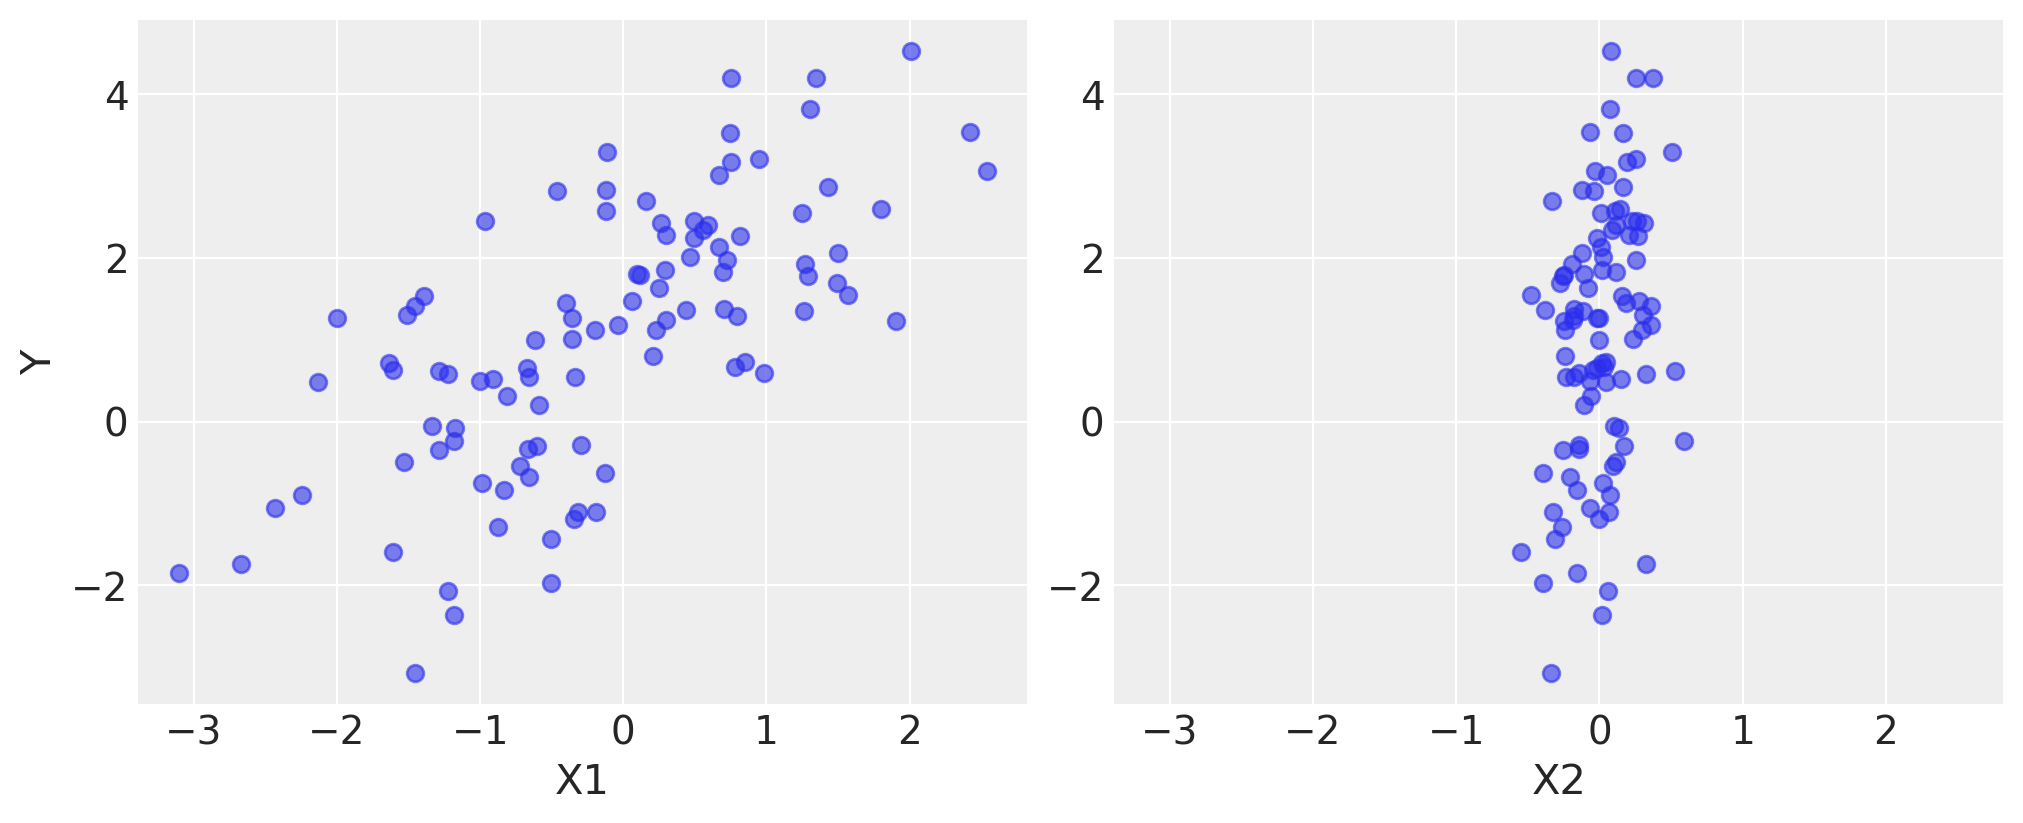

In [14]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize = (10, 4))
axes[0].scatter(X1, Y, alpha = 0.6)
axes[1].scatter(X2, Y, alpha = 0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

# 模型

In [18]:
basic_model = pm.Model()
with basic_model:
    # priors for unknown model parameters
    alpha = pm.Normal("alpha", mu = 0, sigma = 10)
    beta = pm.Normal("beta", mu = 0, sigma = 10, shape = 2)
    sigma = pm.HalfNormal("sigma", sigma = 1)
    # expected value of outcome
    mu = alpha + beta[0] + X1 + beta[1] * X2
    # likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu = mu, sigma = sigma, observed = Y)

    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 884 seconds.


In [ ]:
idata

# 事后分析

In [ ]:
az.plot_trace(idata, combined = True)

In [ ]:
az.summary(idata, round_to = 2)